In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("../../Data/processed/final.csv")  

In [11]:
df['has_https'] = df['url'].str.startswith('https://').astype(int)

In [6]:
df

,url,label,num_dots,num_hyphens,num_slashes,num_digits,num_equals,ip_in_url,has_highly_susp_keyword,hostname_length,...,path_length,max_dir_length,result,hostname,path,longest_dir,max_dir_len,hostname_uncommonness,longest_dir_uncommonness,has_https
0,https://www.google.com,benign,2,0,2,0,0,0,0,14,...,0,0,0.0,www.google.com,NaN,NaN,0,10.893405,0.000000,1
1,https://www.youtube.com,benign,2,0,2,0,0,0,0,15,...,0,0,0.0,www.youtube.com,NaN,NaN,0,10.010763,0.000000,1
2,https://www.facebook.com,benign,2,0,2,0,0,0,0,16,...,0,0,0.0,www.facebook.com,NaN,NaN,0,9.704747,0.000000,1
3,https://www.baidu.com,benign,2,0,2,0,0,0,0,13,...,0,0,0.0,www.baidu.com,NaN,NaN,0,11.462770,0.000000,1
4,https://www.wikipedia.org,benign,2,0,2,0,0,0,0,17,...,0,0,0.0,www.wikipedia.org,NaN,NaN,0,10.131380,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545479,http://blueanchor.nl/dintelmarkt/page/show_cat...,malicious,2,0,7,1,0,0,0,13,...,44,13,1.0,blueanchor.nl,/dintelmarkt/page/show_category/catid/8.html,show_category,13,9.117309,9.005001,0
545480,http://www.hafenrocker.de/index.php,malicious,3,0,3,0,0,0,1,18,...,10,9,1.0,www.hafenrocker.de,/index.php,index.php,9,10.160154,10.237097,0
545481,http://www.kulgupuit.ee/index.php?option=com_p...,malicious,3,1,3,5,7,0,1,16,...,10,9,1.0,www.kulgupuit.ee,/index.php,index.php,9,11.437126,10.237097,0
545482,http://www.nhomkinhdep.com/tu-bep-nhom-kinh.html,malicious,3,3,3,0,0,0,0,19,...,22,21,1.0,www.nhomkinhdep.com,/tu-bep-nhom-kinh.html,tu-bep-nhom-kinh.html,21,10.680512,10.475483,0


In [12]:
TARGET_COL = 'result'

feature_cols = [
    'num_dots',
    'num_hyphens', 
    'num_slashes',
    'num_digits',
    'num_equals',
    'ip_in_url',
    'has_highly_susp_keyword',
    'hostname_length',
    'has_additional_susp_words',
    'has_susp_word_in_path',
    'has_susp_word_in_hostname',
    'has_suspicious_tld',
    'has_uncommon_tld',
    'url_entropy',
    'subdomain_count',
    'no_www',
    'tld_length',
    'short_url',
    'consonant_pair_ratio',
    'punctuation_density',
    'hex_encoding_count',
    'num_subdirs',
    'AtSymbol',
    'NumUnderscore',
    'HasQueryString',
    # 'filename_length',

    'path_length',
    'has_https',
    'max_dir_length',

    'hostname_uncommonness',
    'longest_dir_uncommonness'
]
X = df[feature_cols]
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# importances = rf.feature_importances_
# feat_importances = pd.Series(importances, index=feature_cols)
# feat_importances = feat_importances.sort_values(ascending=False)


KeyError: "['has_https'] not in index"

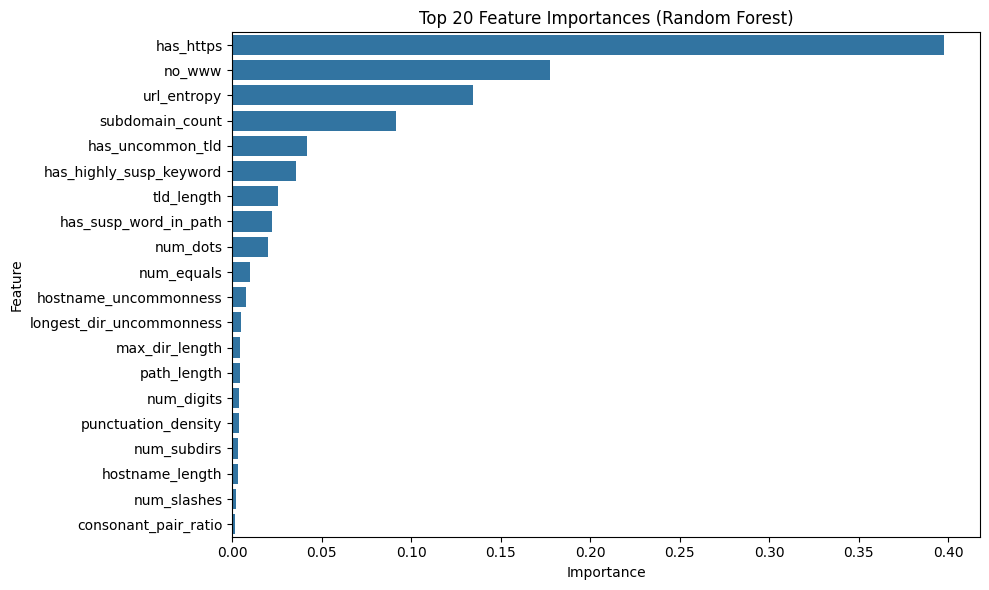

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances[:20], y=feat_importances.index[:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [13]:
selected_features = [
    'has_https',
    'no_www',
    'url_entropy',
    'subdomain_count',
    'has_uncommon_tld',
    'has_highly_susp_keyword',
    'tld_length',
    'has_susp_word_in_path',
    'num_dots',
]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import DBSCAN


sample_df = df[[*selected_features, 'result']].sample(n=100000, random_state=42)

X = sample_df[selected_features]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)




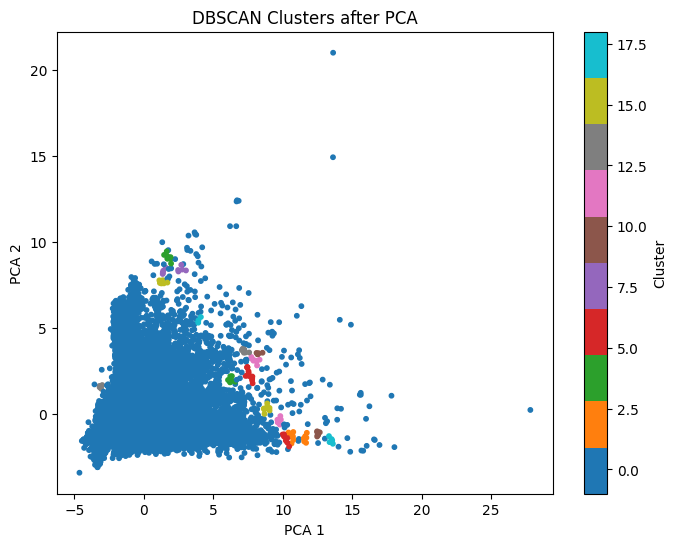

In [ ]:
# plt.figure(figsize=(8, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=10)
# plt.title("DBSCAN Clusters after PCA")
# plt.xlabel("PCA 1")
# plt.ylabel("PCA 2")
# plt.colorbar(label="Cluster")
# plt.show()

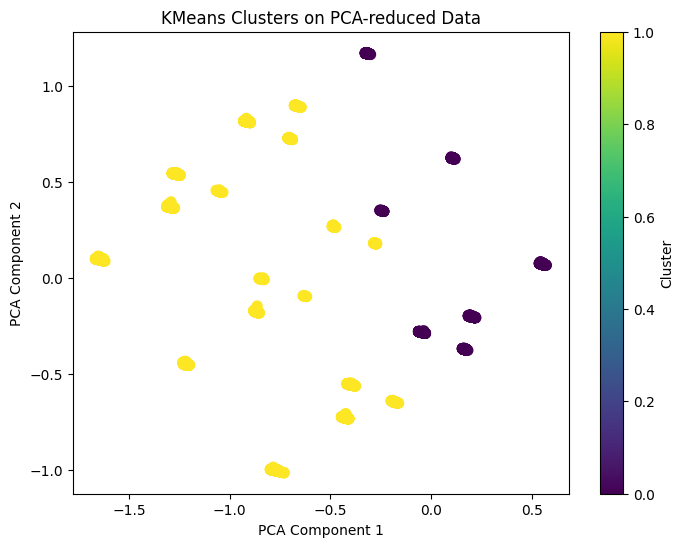

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 2  

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

sample_df['cluster_kmeans'] = clusters

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters on PCA-reduced Data')
plt.colorbar(label='Cluster')
plt.show()


# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
#                     c=clusters, cmap='viridis', s=50, alpha=0.7)

# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')
# ax.set_title('KMeans Clusters on PCA-reduced Data (3D)')

# plt.colorbar(scatter, label='Cluster', shrink=0.5, aspect=5)

# ax.view_init(elev=20, azim=45)

# plt.tight_layout()
# plt.show()

In [65]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_pca, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.6749723608255004


In [60]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(sample_df['result'], clusters)
print("Adjusted Rand Index:", ari)


Adjusted Rand Index: 0.866453445516746


In [61]:
print("Variance explained by each component:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())

Variance explained by each component: [0.56249148 0.2080533 ]
Cumulative variance: [0.56249148 0.77054478]


In [66]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.698


In [17]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(X_pca, clusters)
print(f'Calinski-Harabasz Index : {score:.3f}')

Calinski-Harabasz Index : 160515.543


In [ ]:
X = df.select_dtypes(include=[np.number]).drop(columns=['result', 'label'], errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
df['cluster'] = clusters

print(df.groupby(['cluster', 'label']).size())

cluster  label    
-1       benign       123587
         malicious    110445
 0       benign          247
         malicious         3
 1       benign          131
                       ...  
 9294    malicious         5
 9295    malicious         5
 9296    malicious         5
 9297    malicious         5
 9298    malicious         6
Length: 9498, dtype: int64
